In [239]:
#import some packages
import pandas as pd
import numpy as np
import scipy
from collections import Counter
#plot package
import matplotlib.pyplot as mp
%matplotlib inline

ModuleNotFoundError: No module named 'pandas.Series'

In [15]:
eda_data = pd.read_csv("E:/My Learning/Bittiger BA/Homework/Python project/" + "Python_project_eda.csv")
exp_data = pd.read_csv("E:/My Learning/Bittiger BA/Homework/Python project/" + "python_project_experiment_data.csv")

In [24]:
eda_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,0,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,0,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,1,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,1,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [10]:
exp_data.head()

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
0,IT,2017-04-01,12624549,1593533581388680355,3.799427,12,3454648139452205402,GAMES
1,BR,2017-04-01,12624548,5746748877810015202,2.546213,9,9303514494910504425,GAMES
2,NZ,2017-04-07,12624548,17361185188659735484,13.449449,2,13625318472882626688,GAMES
3,US,2017-04-02,12624549,13365437971635537789,19.990000,5,11936268987816495850,GAMES
4,US,2017-04-03,12624549,13876597780924571273,19.990000,5,11936268987816495850,GAMES


In [23]:
eda_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.314684,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.464390,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [274]:
eda_data['initial_fop_set'] = eda_data['initial_fop_set'] * 1
labels, counter = zip(*Counter(eda_data['initial_fop_set']).items())

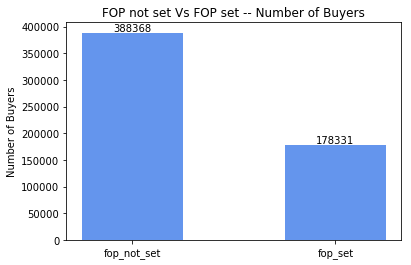

In [275]:
indexes = np.arange(len(labels))
width = 0.5

fig, ax = mp.subplots()
count= ax.bar(indexes, counter, width, color = 'cornflowerblue')

#define a function to autolabel
def autolabel(data):
    for rect in data:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
mp.xticks(indexes, ['fop_not_set','fop_set'])
mp.ylabel('Number of Buyers')
mp.title('FOP not set Vs FOP set -- Number of Buyers')
autolabel(count)
mp.show()

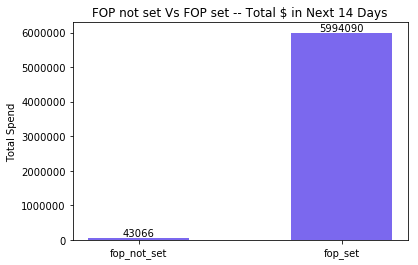

In [195]:
Table1 = eda_data[['initial_fop_set','spend_usd_next_14_days']]
Table2 = Table1.groupby('initial_fop_set')['spend_usd_next_14_days'].sum()

indexes = np.arange(len(labels))
width = 0.5

fig, ax = mp.subplots()
tot_spend = ax.bar(indexes, Table2, width, color = 'mediumslateblue')
mp.xticks(indexes, ['fop_not_set','fop_set'])
mp.ylabel('Total Spend')
mp.title('FOP not set Vs FOP set -- Total $ in Next 14 Days')

#define a function to autolabel
def autolabel(data):
    for rect in data:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(tot_spend)

mp.show()

In [205]:
table1 = eda_data.user_added_credit_card * eda_data.spend_usd_next_14_days
table1.sum()

4155724.468139569

In [206]:
table2 = eda_data.user_added_dcb * eda_data.spend_usd_next_14_days
table2.sum()

3362639.4959600754

In [207]:
table3 = eda_data.user_added_gift_card * eda_data.spend_usd_next_14_days
table3.sum()

2091713.6945839415

In [208]:
table4 = eda_data.user_added_paypal * eda_data.spend_usd_next_14_days
table4.sum()

682936.6403859822

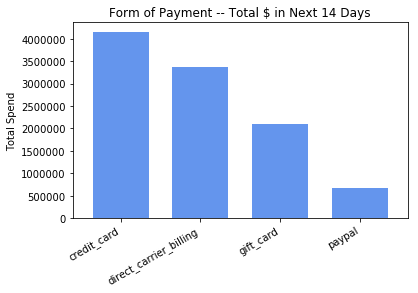

In [272]:
payment = pd.concat([table1, table2, table3, table4], axis = 1)
pm_sum = payment.sum()

fig, ax = mp.subplots()
pm_plot = pm_sum.plot(kind = 'bar', width = 0.7, color = 'cornflowerblue')

mp.xticks(np.arange(4),['credit_card','direct_carrier_billing', 'gift_card', 'paypal'])
mp.ylabel('Total Spend')
mp.title('Form of Payment -- Total $ in Next 14 Days')
mp.gcf().autofmt_xdate()